<a href="https://colab.research.google.com/github/chohoon901/DataAnalysis_1/blob/main/sunghuncho/ch06_03%2Bch07_01_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피봇 & 그룹분석

In [1]:
import pandas as pd
import numpy as np

In [24]:
# https://www.data.go.kr/data/15049906/fileData.do
from google.colab import files

files.upload()

Saving 도로교통공단_사고유형별 교통사고 통계_20211231.csv to 도로교통공단_사고유형별 교통사고 통계_20211231.csv


{'도로교통공단_사고유형별 교통사고 통계_20211231.csv': b'\xbb\xe7\xb0\xed\xc0\xaf\xc7\xfc\xb4\xeb\xba\xd0\xb7\xf9,\xbb\xe7\xb0\xed\xc0\xaf\xc7\xfc\xc1\xdf\xba\xd0\xb7\xf9,\xbb\xe7\xb0\xed\xc0\xaf\xc7\xfc,\xbb\xe7\xb0\xed\xb0\xc7\xbc\xf6,\xbb\xe7\xb8\xc1\xc0\xda\xbc\xf6,\xc1\xdf\xbb\xf3\xc0\xda\xbc\xf6,\xb0\xe6\xbb\xf3\xc0\xda\xbc\xf6,\xba\xce\xbb\xf3\xbd\xc5\xb0\xed\xc0\xda\xbc\xf6\r\n\xc2\xf7\xb4\xeb\xbb\xe7\xb6\xf7,\xc8\xbe\xb4\xdc\xc1\xdf,\xc8\xbe\xb4\xdc\xc1\xdf,12767,445,5999,6664,458\r\n\xc2\xf7\xb4\xeb\xbb\xe7\xb6\xf7,\xc2\xf7\xb5\xb5\xc5\xeb\xc7\xe0\xc1\xdf,\xc2\xf7\xb5\xb5\xc5\xeb\xc7\xe0\xc1\xdf,3628,146,1438,2007,183\r\n\xc2\xf7\xb4\xeb\xbb\xe7\xb6\xf7,\xb1\xe6\xb0\xa1\xc0\xe5\xc0\xda\xb8\xae\xb1\xb8\xbf\xaa\xc5\xeb\xc7\xe0\xc1\xdf,\xb1\xe6\xb0\xa1\xc0\xe5\xc0\xda\xb8\xae\xb1\xb8\xbf\xaa\xc5\xeb\xc7\xe0\xc1\xdf,1973,33,563,1330,121\r\n\xc2\xf7\xb4\xeb\xbb\xe7\xb6\xf7,\xba\xb8\xb5\xb5\xc5\xeb\xc7\xe0\xc1\xdf,\xba\xb8\xb5\xb5\xc5\xeb\xc7\xe0\xc1\xdf,2226,21,745,1455,131\r\n\xc2\xf7\xb4\xeb\xbb

In [4]:
# encoding='cp949'
df = pd.read_csv('한국가스공사_월별 천연가스 생산량_20221031.csv', encoding='cp949')
df.head()

,연도,월,생산량
0,2016,1,4288593.0
1,2016,2,3592400.0
2,2016,3,3201669.0
3,2016,4,2135286.0
4,2016,5,1989360.0


In [5]:
df.describe()

,연도,월,생산량
count,82.000000,82.000000,8.200000e+01
mean,2018.926829,6.378049,3.283609e+06
std,1.980027,3.423377,9.480209e+05
min,2016.000000,1.000000,1.984946e+06
25%,2017.000000,3.250000,2.581310e+06
50%,2019.000000,6.000000,2.969825e+06
75%,2021.000000,9.000000,3.839462e+06
max,2022.000000,12.000000,5.666333e+06


In [6]:
df2=df.iloc[:12,[1,2]].copy()

In [7]:
df2

,월,생산량
0,1,4288593.0
1,2,3592400.0
2,3,3201669.0
3,4,2135286.0
4,5,1989360.0
5,6,2076852.0
6,7,2300665.0
7,8,2278564.0
8,9,2046908.0
9,10,2523673.0


In [9]:
# df.pivot("연도","월","생산량")
df.pivot("월","연도","생산량")

연도,2016,2017,2018,2019,2020,2021,2022
월,,,,,,,
1,4288593.0,4207223.0,5237703.0,4891471.0,4782757.0,5666333.000,5337930.094
2,3592400.0,3804316.0,4384777.0,3970829.0,4245791.0,4342644.000,4727536.483
3,3201669.0,3427452.0,3841499.0,3681343.0,3833352.0,4141503.000,4510243.141
4,2135286.0,2420775.0,3127678.0,3193679.0,2833558.0,3296135.000,3280795.562
5,1989360.0,2075409.0,2742394.0,2597643.0,2165280.0,2972416.000,2918718.758
6,2076852.0,2230415.0,2629796.0,2318995.0,2291469.0,2943359.000,2877369.949
7,2300665.0,2490762.0,2752572.0,2707143.0,2468908.0,3264511.000,3175651.631
8,2278564.0,2269045.0,2726077.0,2673247.0,2812994.0,2942282.000,2885559.384
9,2046908.0,1984946.0,2171415.0,2316792.0,2666938.0,2786125.254,2575865.622


In [12]:
g=df.groupby(df["연도"])


In [13]:
g.groups

{2016: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 2017: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 2018: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 2019: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 2020: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 2021: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 2022: [72, 73, 74, 75, 76, 77, 78, 79, 80, 81]}

In [14]:
g.count()

,월,생산량
연도,,
2016,12,12
2017,12,12
2018,12,12
2019,12,12
2020,12,12
2021,12,12
2022,10,10


In [15]:
g.mean()

,월,생산량
연도,,
2016,6.5,2.818293e+06
2017,6.5,2.970088e+06
2018,6.5,3.406403e+06
2019,6.5,3.288264e+06
2020,6.5,3.331080e+06
2021,6.5,3.688694e+06
2022,5.5,3.522206e+06


In [16]:
pd.options.display.float_format='{:.2f}'.format 

In [17]:
g.mean()

,월,생산량
연도,,
2016,6.50,2818293.33
2017,6.50,2970087.58
2018,6.50,3406403.00
2019,6.50,3288264.25
2020,6.50,3331080.25
2021,6.50,3688693.57
2022,5.50,3522205.73


In [19]:
g.std()

,월,생산량
연도,,
2016,3.61,824526.60
2017,3.61,990274.11
2018,3.61,957689.61
2019,3.61,914919.44
2020,3.61,1011712.59
2021,3.61,910519.81
2022,3.03,962233.98


In [21]:
g2=df.groupby([df.연도,df.월])
g2

In [22]:
g2.groups

{(2016, 1): [0], (2016, 2): [1], (2016, 3): [2], (2016, 4): [3], (2016, 5): [4], (2016, 6): [5], (2016, 7): [6], (2016, 8): [7], (2016, 9): [8], (2016, 10): [9], (2016, 11): [10], (2016, 12): [11], (2017, 1): [12], (2017, 2): [13], (2017, 3): [14], (2017, 4): [15], (2017, 5): [16], (2017, 6): [17], (2017, 7): [18], (2017, 8): [19], (2017, 9): [20], (2017, 10): [21], (2017, 11): [22], (2017, 12): [23], (2018, 1): [24], (2018, 2): [25], (2018, 3): [26], (2018, 4): [27], (2018, 5): [28], (2018, 6): [29], (2018, 7): [30], (2018, 8): [31], (2018, 9): [32], (2018, 10): [33], (2018, 11): [34], (2018, 12): [35], (2019, 1): [36], (2019, 2): [37], (2019, 3): [38], (2019, 4): [39], (2019, 5): [40], (2019, 6): [41], (2019, 7): [42], (2019, 8): [43], (2019, 9): [44], (2019, 10): [45], (2019, 11): [46], (2019, 12): [47], (2020, 1): [48], (2020, 2): [49], (2020, 3): [50], (2020, 4): [51], (2020, 5): [52], (2020, 6): [53], (2020, 7): [54], (2020, 8): [55], (2020, 9): [56], (2020, 10): [57], (2020, 11)

In [23]:
g2.sum()

생산량
연도   월            
2016 1  4288593.00
     2  3592400.00
     3  3201669.00
     4  2135286.00
     5  1989360.00
...            ...
2022 6  2877369.95
     7  3175651.63
     8  2885559.38
     9  2575865.62
     10 2932386.69

[82 rows x 1 columns]

In [28]:
fname=list(files.upload().keys())[0]
df2=pd.read_csv(fname,encoding="cp949")
df2

Saving 도로교통공단_사고유형별 교통사고 통계_20211231.csv to 도로교통공단_사고유형별 교통사고 통계_20211231 (4).csv


,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [29]:
df2_g = df2.groupby([df2['사고유형대분류'], df2['사고유형중분류']])
df2_g

In [30]:
df2_g.groups

{('차대사람', '기타'): [4], ('차대사람', '길가장자리구역통행중'): [2], ('차대사람', '보도통행중'): [3], ('차대사람', '차도통행중'): [1], ('차대사람', '횡단중'): [0], ('차대차', '기타'): [9], ('차대차', '정면충돌'): [5], ('차대차', '추돌'): [8], ('차대차', '측면충돌'): [6], ('차대차', '후진중충돌'): [7], ('차량단독', '공작물충돌'): [12], ('차량단독', '기타'): [16], ('차량단독', '도로이탈'): [14, 15], ('차량단독', '전도'): [10], ('차량단독', '전복'): [11], ('차량단독', '주/정차차량 충돌'): [13], ('철길건널목', '철길건널목'): [17]}

In [32]:
df2_g.mean()

사고건수   사망자수     중상자수     경상자수  부상신고자수
사고유형대분류 사고유형중분류                                             
차대사람    기타         14675.00 333.00  4887.00  9139.00 1062.00
        길가장자리구역통행중  1973.00  33.00   563.00  1330.00  121.00
        보도통행중       2226.00  21.00   745.00  1455.00  131.00
        차도통행중       3628.00 146.00  1438.00  2007.00  183.00
        횡단중        12767.00 445.00  5999.00  6664.00  458.00
차대차     기타         44222.00 248.00  9990.00 49616.00 3839.00
        정면충돌        7892.00 205.00  3539.00  8837.00  588.00
        추돌         32717.00 379.00  7564.00 47111.00 2748.00
        측면충돌       71687.00 404.00 17756.00 84667.00 5781.00
        후진중충돌       3514.00   2.00   304.00  4172.00  162.00
차량단독    공작물충돌       2742.00 340.00  1256.00  1504.00  532.00
        기타          3401.00 148.00  1114.00  2030.00  495.00
        도로이탈         270.50  45.50   136.00   129.00   39.00
        전도           956.00  82.00   384.00   403.00  209.00
        전복           165.00  36.00    87.00    81.00   27.00
        주/정차차량 충돌     23.00   3.00     7.00     8.00    6.00
철길건널목   철길건널목          1.00   0.00     0.00     1.00    0.00

# 시각화

In [34]:
from google.colab import files

fname = list(files.upload().keys())[0]

Saving 한국가스공사_월별 천연가스 생산량_20221031.csv to 한국가스공사_월별 천연가스 생산량_20221031 (1).csv


In [ ]:
df = None
try:
    df = pd.read_csv(fname, encoding='utf8')
    print("UTF-8")
except:
    df = pd.read_csv(fname, encoding='cp949')
    print("CP949")
df

In [38]:
df.iloc[:12], df.loc[:11]

(      연도   월        생산량
 0   2016   1 4288593.00
 1   2016   2 3592400.00
 2   2016   3 3201669.00
 3   2016   4 2135286.00
 4   2016   5 1989360.00
 5   2016   6 2076852.00
 6   2016   7 2300665.00
 7   2016   8 2278564.00
 8   2016   9 2046908.00
 9   2016  10 2523673.00
 10  2016  11 3473228.00
 11  2016  12 3912322.00,       연도   월        생산량
 0   2016   1 4288593.00
 1   2016   2 3592400.00
 2   2016   3 3201669.00
 3   2016   4 2135286.00
 4   2016   5 1989360.00
 5   2016   6 2076852.00
 6   2016   7 2300665.00
 7   2016   8 2278564.00
 8   2016   9 2046908.00
 9   2016  10 2523673.00
 10  2016  11 3473228.00
 11  2016  12 3912322.00)

In [39]:
df.loc[df['연도'] == 2016]

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [41]:
df.query('연도==2016')

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [42]:
df_2016 = df.loc[df['연도'] == 2016].copy()
df_2016

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [43]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

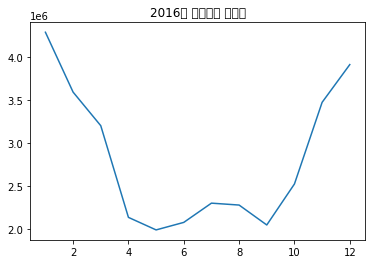

In [44]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'])
plt.show()

In [72]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


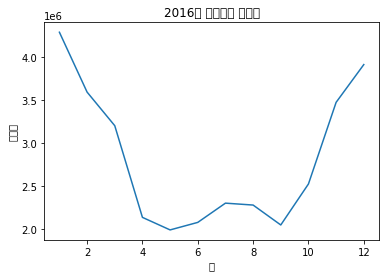

In [46]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'])
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

In [ ]:
#@markdown ![style](https://wikidocs.net/images/page/92083/set_marker_05.png)


In [48]:
df_by_year=lambda year:df.loc[df["연도"]==year].copy()
df_by_year(2016)

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

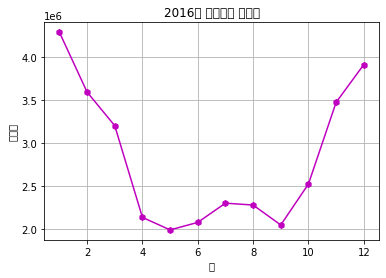

In [49]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'],"mh-")
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

In [50]:
df_by_year=lambda year:df.loc[df["연도"]==year].copy()
df_by_year(2017)

,연도,월,생산량
12,2017,1,4207223.00
13,2017,2,3804316.00
14,2017,3,3427452.00
15,2017,4,2420775.00
16,2017,5,2075409.00
17,2017,6,2230415.00
18,2017,7,2490762.00
19,2017,8,2269045.00
20,2017,9,1984946.00
21,2017,10,2157623.00


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

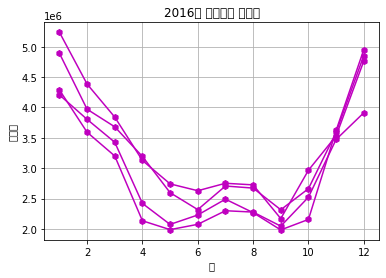

In [51]:
plt.title('2016년 천연가스 생산량')
plt.plot(
    df_by_year(2016)['월'], df_by_year(2016)['생산량'],"mh-",
    df_by_year(2017)['월'], df_by_year(2017)['생산량'],"mh-",
    df_by_year(2018)['월'], df_by_year(2018)['생산량'],"mh-",
    df_by_year(2019)['월'], df_by_year(2019)['생산량'],"mh-",
    )
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

In [52]:
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
month_and_yield(2016)

(0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 11    12
 Name: 월, dtype: int64, 0    4288593.00
 1    3592400.00
 2    3201669.00
 3    2135286.00
 4    1989360.00
 5    2076852.00
 6    2300665.00
 7    2278564.00
 8    2046908.00
 9    2523673.00
 10   3473228.00
 11   3912322.00
 Name: 생산량, dtype: float64)

In [60]:
draw_plot=lambda year : plt.plot(*month_and_yield(year), '*:',label=f'{year}')

In [73]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트를 나눔폰트로 설정
plt.rc('font', family='NanumBarunGothic')

In [58]:
[v for v in df['연도'].unique()]
[v for v in set(df['연도'])]

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

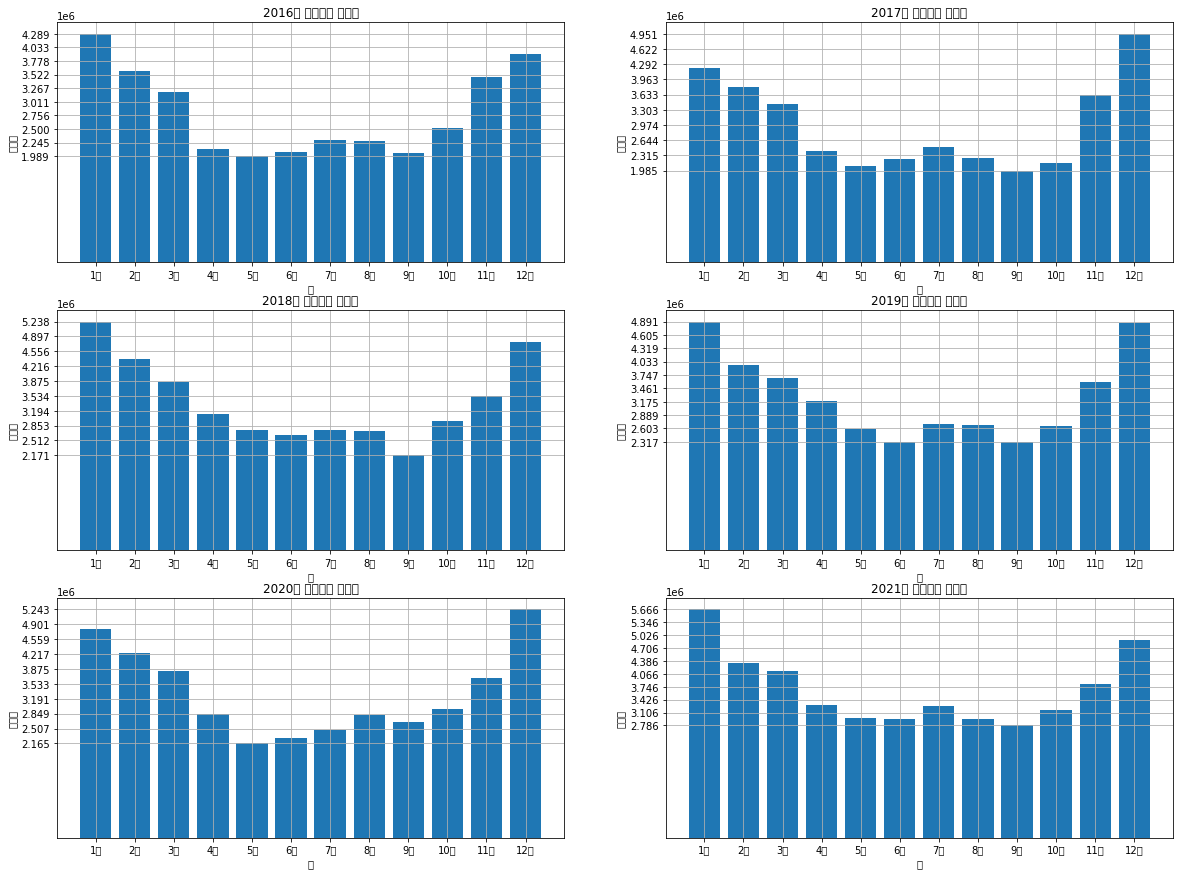

In [81]:
df_by_year=lambda year:df.loc[df["연도"]==year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
draw_plot=lambda year : plt.plot(*month_and_yield(year), '*:',label=f'{year}')

plt.rc('font', family='NanumBarunGothic')

def draw_plot(i,year):
  plt.subplot(3,2,i+1)
  plt.title(f'{year}년 천연가스 생산량')
  # plt.plot(*month_and_yield(year),'*:', label=f'{year}')
  my=month_and_yield(year)
  plt.bar(*my)
  plt.grid(True)
  plt.xlabel('월')
  plt.ylabel('생산량')
  plt.xticks(my[0],[f"{v}월" for v in my[0]])
  plt.yticks(np.linspace(my[1].min(),my[1].max(),10))
  # plt.legend(loc=0)
plt.figure(figsize=(20,15))

for v in enumerate(df["연도"].unique()[:-1]):
  draw_plot(*v)

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

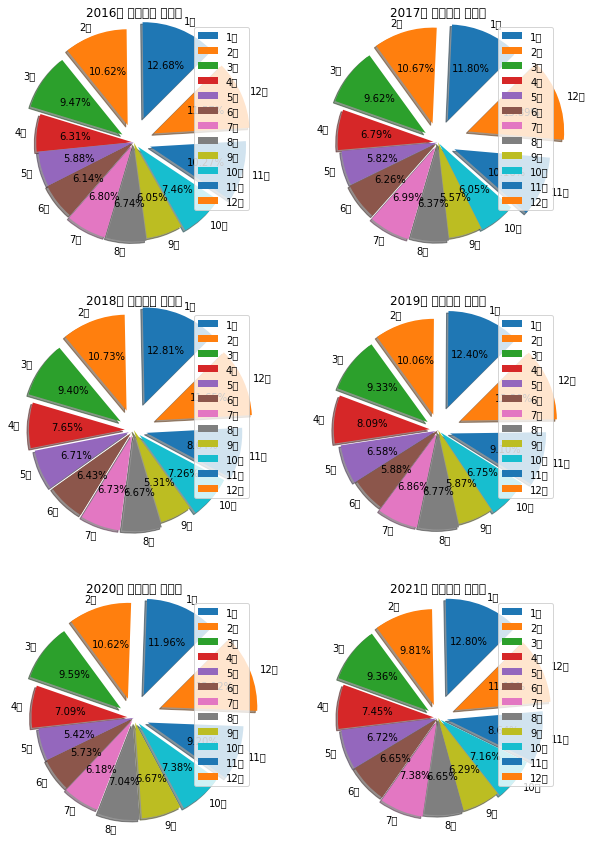

In [87]:
df_by_year=lambda year:df.loc[df["연도"]==year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
# draw_plot=lambda year : plt.plot(*month_and_yield(year), '*:',label=f'{year}')

plt.rc('font', family='NanumBarunGothic')

def draw_plot(i,year):
  plt.subplot(3,2,i+1)
  plt.title(f'{year}년 천연가스 생산량')
  # plt.plot(*month_and_yield(year),'*:', label=f'{year}')
  my=month_and_yield(year)
  m=my[1]/my[1].mean()
  m2 = (m - m.min()) / 3
  plt.pie(my[1],labels=[f"{v}월" for v in my[0]],autopct="%1.2f%%",
          explode=m2,shadow=True,startangle=45)
  plt.axis=('equal')
  plt.legend(loc=0)
plt.figure(figsize=(10,15))

for v in enumerate(df["연도"].unique()[:-1]):
  draw_plot(*v)

plt.show()
